h=5
Create V with N = 126 states
Calculating states, time per iteration accelerates.


100%|██████████| 5/5 [00:00<00:00, 2343.97it/s]


p1=0.3,p2=0.4
Plot histograms for 100 runs


100%|██████████| 100/100 [00:00<00:00, 4709.21it/s]


p1=0.3,p2=0.8
Plot histograms for 100 runs


100%|██████████| 100/100 [00:00<00:00, 4385.19it/s]


p1=0.9,p2=0.8
Plot histograms for 100 runs


100%|██████████| 100/100 [00:00<00:00, 5677.34it/s]


h=30
Create V with N = 46376 states
Calculating states, time per iteration accelerates.


100%|██████████| 30/30 [00:01<00:00, 27.67it/s]


p1=0.3,p2=0.4
Plot histograms for 100 runs


100%|██████████| 100/100 [00:00<00:00, 164.54it/s]


p1=0.3,p2=0.8
Plot histograms for 100 runs


100%|██████████| 100/100 [00:00<00:00, 180.03it/s]


p1=0.9,p2=0.8
Plot histograms for 100 runs


100%|██████████| 100/100 [00:00<00:00, 182.94it/s]


h=100
Create V with N = 4598126 states
Calculating states, time per iteration accelerates.


100%|██████████| 100/100 [01:47<00:00,  1.08s/it]


p1=0.3,p2=0.4
Plot histograms for 100 runs


100%|██████████| 100/100 [01:07<00:00,  1.48it/s]


p1=0.3,p2=0.8
Plot histograms for 100 runs


100%|██████████| 100/100 [01:03<00:00,  1.58it/s]


p1=0.9,p2=0.8
Plot histograms for 100 runs


100%|██████████| 100/100 [01:03<00:00,  1.57it/s]


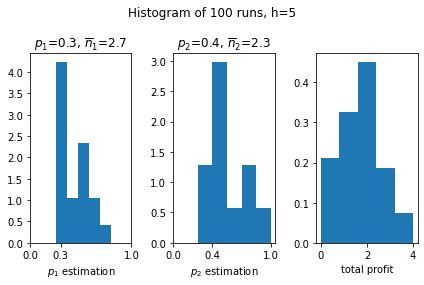

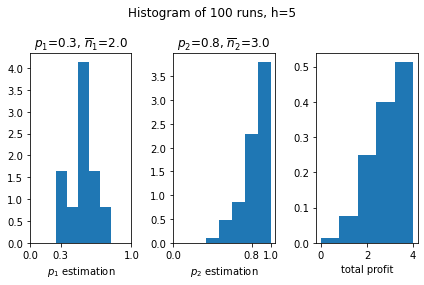

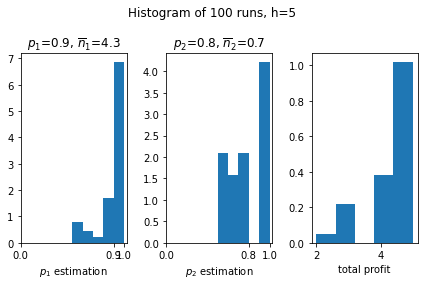

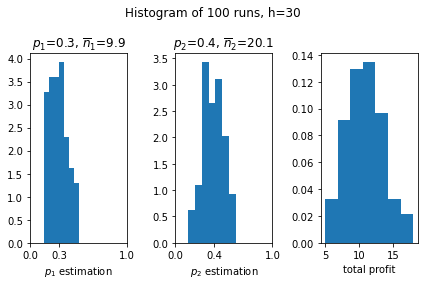

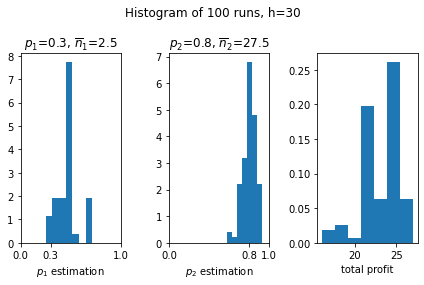

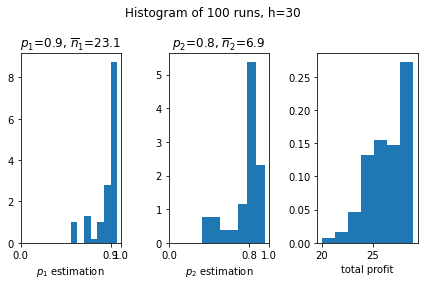

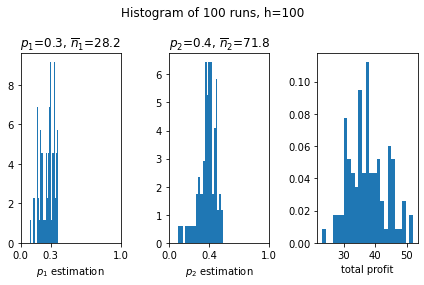

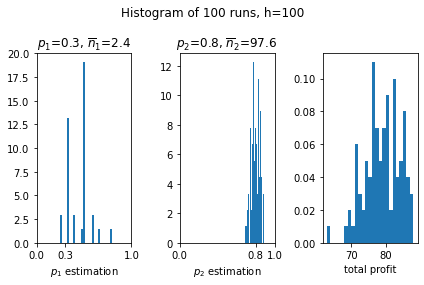

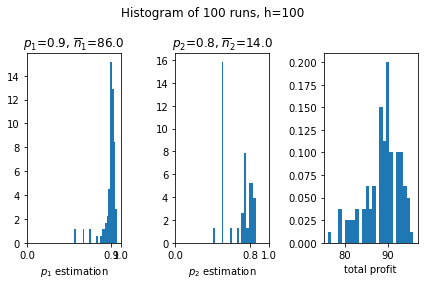

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm

def p(n,w): # calculate expected probability from drawings and payoffs for a machine
    return (w+1)/(n+2)

def get_V(h):
    t_array = np.zeros(h)
    V = np.zeros([h+1,h+1,h+1,h+1])
    print('Create V with N =',int((h**4+10*h**3+35*h**2+50*h+24)/24),'states')
    t1 = time()
    counts = np.zeros(h)
    count = 0
    for n1 in range(h): # look at all states at a certain time
        n2 = h-1-n1 # (n1,n2) = (10,0),(9,1),(8,2),...,(9,0),(8,1),(7,2),...,(8,0),(7,1),...,...(0,1),(1,0),(0,0) --> state (0,0) can maybe cause problems       
        for w1 in range(n1+1):
            for w2 in range(n2+1):
                count += 1
                V[n1,w1,n2,w2] = np.max([p(n1,w1),p(n2,w2)])
    t2 = time()
    t_array[h-1] = t2-t1

    print("Calculating states, time per iteration accelerates.")
    for t in tqdm(range(h)[::-1]): # look at all time points 
        count = 0
        t1 = time()
        for n1 in range(t+1): # look at all states at a certain time
            n2 = t-1-n1 # (n1,n2) = (10,0),(9,1),(8,2),...,(9,0),(8,1),(7,2),...,(8,0),(7,1),...,...(0,1),(1,0),(0,0) --> state (0,0) can maybe cause problems       
            for w1 in range(n1+1):
                for w2 in range(n2+1):
                    count += 1
                    value1 = p(n1,w1)*(1+V[n1+1,w1+1,n2,w2])+(1-p(n1,w1))*V[n1+1,w1,n2,w2]
                    value2 = p(n2,w2)*(1+V[n1,w1,n2+1,w2+1])+(1-p(n2,w2))*V[n1,w1,n2+1,w2]
                    V[n1,w1,n2,w2] = np.max([value1,value2],axis=0)
        t2 = time()
        t_array[h-1-t] = t2-t1
        counts[h-1-t] = count
    return V,t_array,counts

def two_armed_bandit(V,p1,p2):
    h = np.where(V!=0)[0][-1]+1
    # initialize values before drawing
    n1,w1,n2,w2 = 0,0,0,0 # initialize states
    states = np.zeros([h+1,4]) # state matrix

    for i in range(1,h+1): # first state is all zeros, from there fill in the matrix
        value1 = p(n1,w1)*(1+V[n1+1,w1+1,n2,w2])+(1-p(n1,w1))*V[n1+1,w1,n2,w2]
        value2 = p(n2,w2)*(1+V[n1,w1,n2+1,w2+1])+(1-p(n2,w2))*V[n1,w1,n2+1,w2]
        machine =  np.argmax([value1,value2]) + 1
        if machine==1:
            n1 += 1
            if np.random.rand()<p1:
                w1 += 1
        else:
            n2 += 1
            if np.random.rand()<p2:
                w2 += 1
        states[i] = n1,w1,n2,w2
        w = w1+w2
    return states,w

def time_plot(h,t,counts): # time plot of iterations
    t2 = np.linspace(0,h,len(t[:-1]))
    fig,ax = plt.subplots()
    ax.plot(np.arange(h)[::-1],t,label='measured time')
    ax.plot(t2,np.mean(t[:-1]/counts[:-1])*(1/6*t2**3+t2**2+11/6*t2+1),label='estimated time')
    ax.set_xlabel('iteration t')
    ax.set_ylabel('time per iteration t')
    ax.set_xticks(np.arange(0,h,int(h/10)))
    ax.set_xlim([0,h-5])
    ax.legend()
    plt.show()

def print_V(V): # print all V values
    h = np.where(V!=0)[0][-1]+1
    if h<6:
        print('All states for h={}:'.format(h))
        for i in np.transpose(np.where(V!=0)):
            print('({}{}{}{})={:.2f}'.format(i[0],i[1],i[2],i[3],np.round(V[i[0],i[1],i[2],i[3]],2)),end=" ")

def plot_hist(V,p1,p2,runs=100): # plot estimated p1,p2 and profit
    h = np.where(V!=0)[0][-1]+1
    w_array = np.zeros(runs)
    all_states = np.zeros([runs,4])
    print('Plot histograms for {} runs'.format(runs))
    for i in tqdm(range(runs)):
        states,w_array[i] = two_armed_bandit(V,p1,p2)
        all_states[i] = states[-1]
    p1_estimates = all_states[:,1]/np.where(all_states[:,0]==0,1,all_states[:,0])
    p2_estimates = all_states[:,3]/np.where(all_states[:,2]==0,1,all_states[:,2])
    n1 = all_states[:,0]
    n2 = all_states[:,2]

    fig,ax = plt.subplots(ncols=3) 
    if h<10:
        ax[0].hist(p1_estimates[np.where(p1_estimates!=0)],bins=5,density=True) 
        ax[1].hist(p2_estimates[np.where(p2_estimates!=0)],bins=5,density=True) 
        ax[2].hist(w_array,bins=5,density=True)
    else:
        ax[0].hist(p1_estimates[np.where(p1_estimates!=0)],bins=int(h/4),density=True) 
        ax[1].hist(p2_estimates[np.where(p2_estimates!=0)],bins=int(h/4),density=True) 
        ax[2].hist(w_array,bins=int(h/4),density=True) 
    ax[0].set_xlabel('$p_1$ estimation') 
    ax[0].set_title('$p_1$=%.1f, $\overline{n}_1$=%.1f' % (p1,round(np.mean(n1),1))) 
    ax[0].set_xticks([0,p1,1])
    ax[1].set_xlabel('$p_2$ estimation')
    ax[1].set_title('$p_2$=%.1f, $\overline{n}_2$=%.1f' % (p2,round(np.mean(n2),1))) 
    ax[1].set_xticks([0,p2,1])
    ax[2].set_xlabel('total profit')
    fig.suptitle('Histogram of {} runs, h={}'.format(runs,h))
    fig.tight_layout()
    plt.show()

# for h in [5,30,100]:
#     print('h={}'.format(h))
#     V,t,counts = get_V(h)
#     for p1,p2 in [(0.3,0.4),(0.3,0.8),(0.9,0.8)]:
#         print('p1={},p2={}'.format(p1,p2))
#         plot_hist(V,p1,p2,100)

h = 50
p1,p2 = 0.6,0.8 
runs = 100
V,t,counts = get_V(h)
print_V(V) 
time_plot(h,t,counts)
plot_hist(V,p1,p2,runs)
